In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [137]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']

In [138]:
df = pd.read_csv('iris.csv', names=columns)

In [139]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.1,3.0,1.4,0.2,Iris-setosa
2,7.1,3.2,1.3,0.2,Iris-setosa
3,8.1,3.1,1.5,0.2,Iris-setosa
4,9.1,3.6,1.4,0.2,Iris-setosa


In [140]:
df.describe()


,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,79.600000,3.054000,3.758667,1.198667
std,43.445368,0.433594,1.764420,0.763161
min,5.100000,2.000000,1.000000,0.100000
25%,42.350000,2.800000,1.600000,0.300000
50%,79.600000,3.000000,4.350000,1.300000
75%,116.850000,3.300000,5.100000,1.800000
max,154.100000,4.400000,6.900000,2.500000


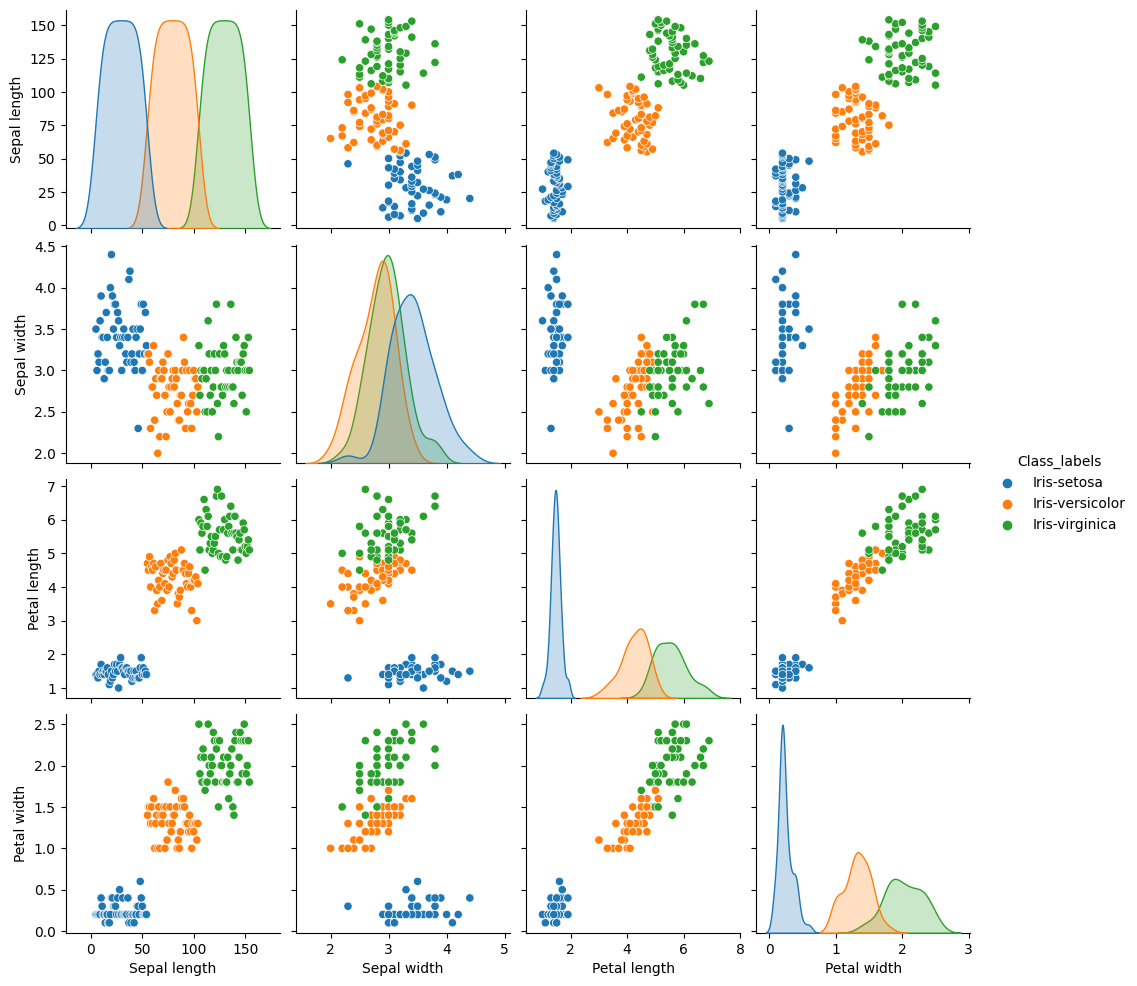

In [141]:
sns.pairplot(df, hue='Class_labels')

In [142]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [143]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

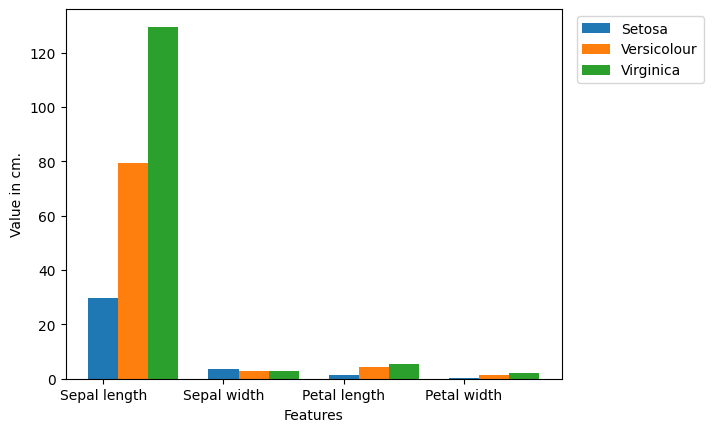

In [144]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [146]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [147]:
predictions = svn.predict(X_test)


In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [150]:
X_new = np.array([[3, 2, 1, 0.2], [149.9, 52.2, 13.8, 10.1], [100.3, 2.5, 4.6, 1.9]])
#Prediction of the species from the input vector

prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


In [151]:
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

In [152]:
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)

In [153]:
model.predict(X_new)

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [154]:
guess = np.array([[1.3, 2.4, 2.6, 2], [70.3, 60.4, 40, 92.3], [150.8, 48, 69, 99]])
model.predict(guess)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)